# Assignemnt 5

Question1-Question3:

https://github.com/RoboticsAndCloud/Machine_Learning_2022_Fall/blob/main/Assignment5%20ML2022.pdf

In [33]:
from traitlets.config.application import deepcopy
import numpy as np
import matplotlib.pyplot as plt

# P1 Read files 
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


(16384, 3)
centroid: [[119.88116455 181.52505493 218.9203949 ]
 [153.92979431 146.16104126 150.44528198]
 [ 75.0625     102.875      130.58000183]
 [ 59.92853165  62.9487915   70.94259644]
 [ 72.23519897 142.24111938 193.79548645]
 [ 25.19369698  27.67238235  25.97034264]
 [192.95010376 225.25488281 239.47401428]]


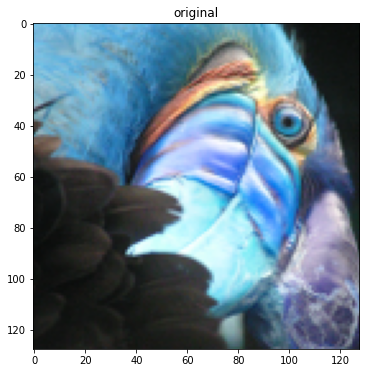

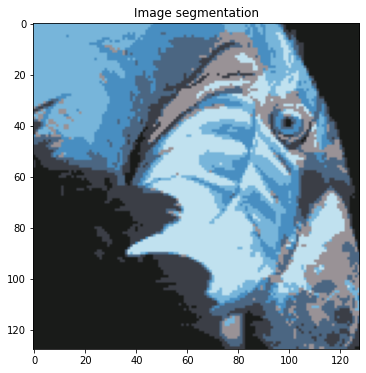

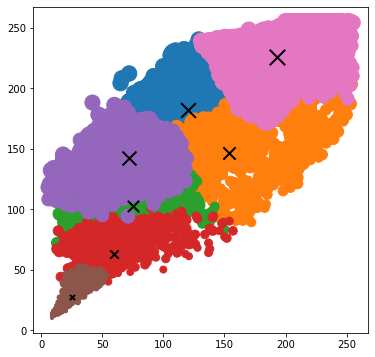

Save image: True


In [35]:
# Reference:
# https://medium.com/analytics-vidhya/color-separation-in-an-image-using-kmeans-clustering-using-python-f994fa398454
# https://medium.com/analytics-vidhya/image-segmentation-using-k-means-clustering-from-scratch-1545c896e38e

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

"""
Euclidean distance between point & data.
Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
"""
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

class KMeans_Seg():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            # if self.plot_steps:
            #     self.plot()
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Store the samples into the clusters with the closest centroids index
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # Check the euclidean distance of the current sample to each centroid
        # Return the min index
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # check the distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()
    
    # return the centroids of the K clusters
    def get_centroids(self):
        return self.centroids


######################## Main Function ##################################
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment5/input.png')
plt.figure(figsize=(6, 6))
plt.title("original")
plt.imshow(image)

# Number of cluster
k_cluster = 7

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

k = KMeans_Seg(K=k_cluster, max_iters=50, plot_steps = False)  
y_pred = k.fit(pixel_values) 
print("centroid:", k.get_centroids())

centers = np.uint8(k.get_centroids())
centers

y_pred = y_pred.astype(int)
np.unique(y_pred)

# the lable for each point
labels = y_pred.flatten()

# assign the clusterred value to each point so that generate the fianl image
seg_image = centers[labels.flatten()]
seg_image = seg_image.reshape(image.shape)
plt.figure(figsize=(6, 6))
plt.title("Image segmentation")
plt.imshow(seg_image)

plt.show()

# Output the position of the centroid
k.plot()

status = cv2.imwrite('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment5/output1.png', segmented_image)
print('Save image:', status)